In [ ]:
!git clone https://github.com/Char1iee/NBA_Odds_Analysis

fatal: destination path 'NBA_Odds_Analysis' already exists and is not an empty directory.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [ ]:
import numpy as np
np.random.seed(42)

import keras
from keras import layers, Model

from keras.optimizers import Adam
from keras.layers import RNN, Dense, Input, SimpleRNN, Concatenate
from keras.callbacks import EarlyStopping

import tensorflow as tf

In [ ]:
X = pd.read_csv("NBA_Odds_Analysis/inputs.csv")
Y = pd.read_csv("NBA_Odds_Analysis/outputs.csv")


In [ ]:
X

,season,home/visitor,day,day_of_week,month,games_played,cumulative_wins,cumulative_win_rate,cumulative_score,average_score,...,team-LA Clippers,opponent-LA Clippers,team-Charlotte,opponent-Charlotte,team-Boston,opponent-Boston,team-Oklahoma City,opponent-Oklahoma City,team-Brooklyn,opponent-Brooklyn
0,0.0,0.0,0.966667,0.166667,0.818182,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.966667,0.166667,0.818182,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.966667,0.166667,0.818182,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.966667,0.166667,0.818182,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.966667,0.166667,0.818182,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37099,1.0,0.0,0.500000,0.000000,0.000000,0.530864,0.338028,0.558140,0.502194,0.798339,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37100,1.0,1.0,0.500000,0.000000,0.000000,0.518519,0.183099,0.309524,0.514002,0.836565,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37101,1.0,1.0,0.500000,0.000000,0.000000,0.543210,0.267606,0.431818,0.524660,0.815097,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37102,1.0,1.0,0.500000,0.000000,0.000000,0.543210,0.309859,0.500000,0.527795,0.819968,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
Y

,moneyLine,total,spread,secondHalfTotal,score
0,0.671795,0.515528,0.523256,0.524390,0.975165
1,0.676410,0.354037,0.616279,0.365854,-0.829566
2,0.654872,0.354037,0.383721,0.365854,-0.679171
3,0.594872,0.236025,0.197674,0.268293,0.147997
4,0.712821,0.236025,0.802326,0.268293,-0.528777
...,...,...,...,...,...
37099,0.671795,0.596273,0.534884,0.548780,1.426347
37100,0.625641,0.751553,0.209302,0.829268,2.403910
37101,0.660513,0.596273,0.465116,0.548780,1.275953
37102,0.657692,0.763975,0.406977,0.853659,1.576742


In [ ]:
I = {}
for col in X.columns:
  if col.startswith("team-"):
    team = col[5:]
    I[team] = []
    for i in range(X.shape[0]):
      if X[col][i] == 1:
        I[team].append(i)

In [ ]:
print(I['Atlanta'])

[33, 73, 97, 118, 131, 183, 208, 256, 270, 309, 325, 375, 409, 428, 457, 506, 512, 548, 579, 606, 623, 658, 677, 721, 739, 779, 822, 870, 916, 951, 971, 1019, 1065, 1081, 1109, 1129, 1161, 1209, 1224, 1270, 1297, 1323, 1334, 1384, 1406, 1430, 1453, 1475, 1518, 1528, 1566, 1596, 1612, 1642, 1669, 1704, 1730, 1749, 1780, 1807, 1824, 1857, 1886, 1910, 1939, 1976, 1995, 2022, 2071, 2104, 2126, 2147, 2188, 2202, 2241, 2265, 2280, 2312, 2364, 2375, 2429, 2445, 2482, 2531, 2575, 2613, 2640, 2656, 2671, 2710, 2732, 2764, 2795, 2802, 2828, 2891, 2928, 2951, 2993, 3024, 3036, 3073, 3102, 3121, 3135, 3162, 3191, 3220, 3260, 3294, 3332, 3360, 3379, 3421, 3438, 3503, 3532, 3559, 3588, 3597, 3621, 3682, 3685, 3729, 3763, 3771, 3809, 3834, 3852, 3910, 3928, 3950, 4003, 4009, 4040, 4074, 4098, 4141, 4163, 4196, 4226, 4251, 4281, 4294, 4316, 4352, 4388, 4403, 4445, 4472, 4500, 4530, 4561, 4594, 4605, 4647, 4679, 4709, 4738, 4781, 4791, 4818, 4889, 4904, 4936, 4981, 5000, 5035, 5055, 5064, 5093, 5153, 5

In [ ]:
df = pd.concat([X, Y], axis=1)

X_team = {}
for col in X.columns:
  if col.startswith("team-"):
    team = col[5:]
    prev_season = -1
    games = []
    X_team[team] = []
    for i in range(len(I[team])):
      if X['season'][I[team][i]] != prev_season:
        prev_season = X['season'][I[team][i]]
        games.clear()
      X_team[team].append(games.copy())
      games.append(df.iloc[I[team][i]])

In [ ]:
df.head()

,season,home/visitor,day,day_of_week,month,games_played,cumulative_wins,cumulative_win_rate,cumulative_score,average_score,...,opponent-Boston,team-Oklahoma City,opponent-Oklahoma City,team-Brooklyn,opponent-Brooklyn,moneyLine,total,spread,secondHalfTotal,score
0,0.0,0.0,0.966667,0.166667,0.818182,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.671795,0.515528,0.523256,0.524390,0.975165
1,0.0,1.0,0.966667,0.166667,0.818182,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.676410,0.354037,0.616279,0.365854,-0.829566
2,0.0,0.0,0.966667,0.166667,0.818182,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.654872,0.354037,0.383721,0.365854,-0.679171
3,0.0,1.0,0.966667,0.166667,0.818182,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.594872,0.236025,0.197674,0.268293,0.147997
4,0.0,0.0,0.966667,0.166667,0.818182,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.712821,0.236025,0.802326,0.268293,-0.528777


In [ ]:
date_cols = ['season', 'day', 'day_of_week', 'month', 'sin_day', 'sin_day_of_week', 'sin_month']

In [ ]:
def rnn_model(lr=1e-4, seq_len=5, rnn_units=16, rnn_activation="tanh", dense1_units=32, dense1_activation="linear", dense2_units=16, dense2_activation="linear", **kwargs):
  x_total = Input(shape=(None, df.shape[1]), name="x_total")
  x_team = x_total[:seq_len]
  x_opponent = x_total[seq_len:]

  rnn = SimpleRNN(rnn_units, activation=rnn_activation)

  r_team = rnn(x_team)
  r_opponent = rnn(x_opponent)

  x = Concatenate(axis=0)([r_team, r_opponent])
  x = Dense(dense1_units, activation=dense1_activation)(x)
  x = Dense(dense2_units, activation=dense2_activation)(x)
  x = Dense(Y.shape[1])(x)

  model = Model(inputs=x_total, outputs=x, name="rnn_model")

  op = Adam(learning_rate = lr)
  model.compile(optimizer = op, loss = 'mse')

  return model

In [ ]:
model = rnn_model()
model.summary()

Model: "rnn_model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 x_total (InputLayer)        [(None, None, 85)]           0         []                            
                                                                                                  
 tf.__operators__.getitem_1  (None, None, 85)             0         ['x_total[0][0]']             
 0 (SlicingOpLambda)                                                                              
                                                                                                  
 tf.__operators__.getitem_1  (None, None, 85)             0         ['x_total[0][0]']             
 1 (SlicingOpLambda)                                                                              
                                                                                          

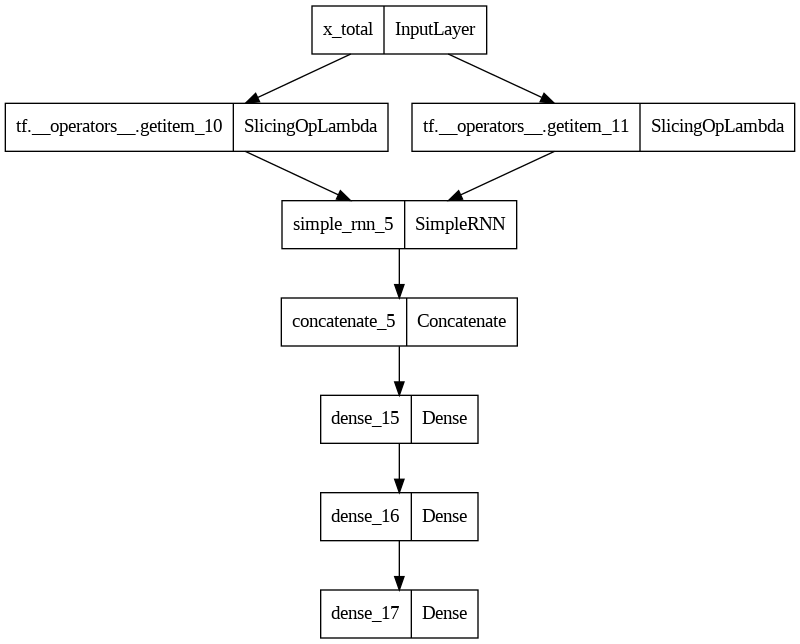

In [ ]:
keras.utils.plot_model(model, "rnn.png")

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=2,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0
)

In [ ]:
hyperparameters_grid = {
    "lr":[1e-5, 5e-5, 1e-4, 5e-4, 1e-3],
    "seq_len":[3, 5, 10, 15, 25],
    "rnn_units":[4, 8, 16, 32, 64, 128],
    "rnn_activation":["sigmoid", "tanh", "relu"],
    "dense1_units":[4, 8, 16, 32, 64, 128],
    "dense1_activation":["sigmoid", "tanh", "relu", "linear"],
    "dense2_units":[4, 8, 16, 32, 64, 128],
    "dense2_activation":["sigmoid", "tanh", "relu", "linear"],
    "epochs":[20, 50, 100, 200, 500],
    "batch_size":[8, 16, 32, 64, 128]
}

In [ ]:
max_seq_len = max(hyperparameters_grid["seq_len"])
X_max = []
for i in range(X.shape[0]):
  team = ""
  for col in X.columns:
    if col.startswith("team-") and X[col][i] == 1:
      team = col[5:]
  opponent = ""
  for col in X.columns:
    if col.startswith("opponent-") and X[col][i] == 1:
      opponent = col[9:]
  team_idx = min(np.searchsorted(I[team], i), len(X_team[team])-1)
  opponent_idx = min(np.searchsorted(I[opponent], i), len(X_team[opponent])-1)

  team_seq = np.array(X_team[team][team_idx]).reshape(-1,df.shape[1])
  opponent_seq = np.array(X_team[opponent][opponent_idx]).reshape(-1,df.shape[1])
  if (len(team_seq) < max_seq_len):
    team_seq = np.pad(team_seq, ((max_seq_len-len(X_team[team][team_idx]), 0), (0, 0)), 'constant', constant_values=((0,0),(0,0)))
  else:
    team_seq = team_seq[-max_seq_len:]
  if (len(opponent_seq) < max_seq_len):
    opponent_seq = np.pad(opponent_seq, ((max_seq_len-len(X_team[opponent][opponent_idx]), 0), (0, 0)), 'constant', constant_values=((0,0),(0,0)))
  else:
    opponent_seq = opponent_seq[-max_seq_len:]
  X_max.append([team_seq, opponent_seq])

In [ ]:
def buildX(seq_len=5, **kwargs):
  X_rnn = []
  for i in range(X.shape[0]):
    X_rnn.append(np.concatenate([X_max[i][0][-seq_len:], X_max[i][1][-seq_len:]], axis=0))

  return X_rnn

In [ ]:
def train(model, x_train, y_train, x_val, y_val, epochs, batch_size, **kwargs):
  history = model.fit(x_train, y_train, epochs = epochs, validation_data=(x_val, y_val), callbacks=[early_stopping], batch_size=batch_size, shuffle=False, verbose=0)
  return history

In [ ]:
def trial(**kwargs):
  global Y
  model = rnn_model(**kwargs)

  X_rnn = buildX(**kwargs)
  X_rnn = np.asarray(X_rnn).astype('float64')
  Y = np.asarray(Y).astype('float64')

  x_train, x_test, y_train, y_test = train_test_split(X_rnn, Y, test_size = 0.3, shuffle = False)
  x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, shuffle = False)

  history = train(model, x_train, y_train, x_val, y_val, **kwargs)

  yhat_val = model.predict(x_val)
  val_mse = mean_squared_error(y_val, yhat_val)

  return model, history, val_mse, (X_rnn, Y)

In [ ]:
best_model = None
best_data = None
best_hyperparameters = None
best_history = None
best_val_mse = None
def run_trials(num_trials):
  global best_model, best_data, best_hyperparameters, best_history, best_val_mse
  for i in range(num_trials):
    print("Model", i+1)
    hyperparameters = {}
    for hp in hyperparameters_grid:
      hyperparameters[hp] = np.random.choice(hyperparameters_grid[hp], 1)[0]

    model, history, val_mse, data = trial(**hyperparameters)
    if (best_val_mse == None or best_val_mse > val_mse):
      best_model = model
      best_data = data
      best_hyperparameters = hyperparameters
      best_history = history
      best_val_mse = val_mse

    print("Final validation MSE:", val_mse)
    print()

  print("Best model hyperparameters:", best_hyperparameters)
  print("Best validation MSE:", best_val_mse)

with tf.device('/GPU:0'):
  run_trials(20)

Model 1
163/163 [==============================] - 1s 6ms/step
Final validation MSE: 0.14810211944545854

Model 2
163/163 [==============================] - 2s 7ms/step
Final validation MSE: 0.1568913078427307

Model 3
163/163 [==============================] - 1s 2ms/step
Final validation MSE: 0.14829178913250934

Model 4
163/163 [==============================] - 1s 2ms/step
Final validation MSE: 0.14801163480198395

Model 5
163/163 [==============================] - 1s 3ms/step
Final validation MSE: 0.18623447352684588

Model 6
163/163 [==============================] - 1s 2ms/step
Final validation MSE: 0.15675986492358635

Model 7
163/163 [==============================] - 1s 7ms/step
Final validation MSE: 0.15338847914586085

Model 8
163/163 [==============================] - 1s 3ms/step
Final validation MSE: 0.14886924697886497

Model 9
163/163 [==============================] - 1s 6ms/step
Final validation MSE: 0.15587757894362095

Model 10
163/163 [=============================

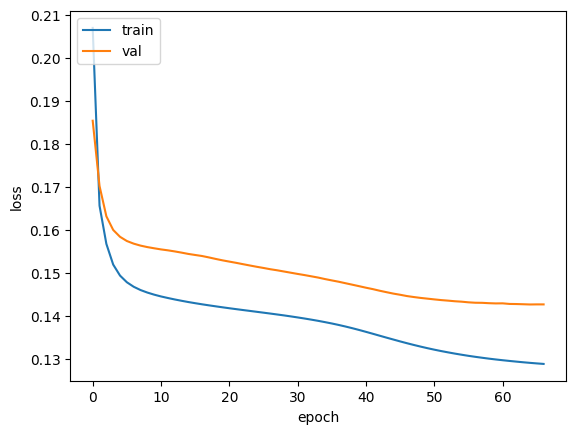

In [ ]:
plt.plot(best_history.history['loss'])
plt.plot(best_history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

In [ ]:
X_rnn, Y = best_data
x_train, x_test, y_train, y_test = train_test_split(X_rnn, Y, test_size = 0.3, shuffle = False)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, shuffle = False)

y_pred_train = best_model.predict(x_train)
y_pred_val = best_model.predict(x_val)
y_pred_test = best_model.predict(x_test)

348/348 [==============================] - 1s 4ms/step


In [ ]:
def print_mse(y_true, yhat):
  print("Average MSE:", mean_squared_error(y_true, yhat))
  for i in range(Y.shape[1]):
      print("MSE:")
      print(f"{mean_squared_error(y_true[:, i], yhat[:, i])}")

In [ ]:
print_mse(y_train, y_pred_train)

Average MSE: 0.1287559166159787
MSE:
0.0007877670127151246
MSE:
0.004731977846787153
MSE:
0.012306012261681275
MSE:
0.004561986994202464
MSE:
0.6213918389645043


In [ ]:
print_mse(y_val, y_pred_val)

Average MSE: 0.14265901374249906
MSE:
0.0011239104432629557
MSE:
0.004943525214943689
MSE:
0.01272378711362996
MSE:
0.0068073302831513725
MSE:
0.6876965156575068


In [ ]:
print_mse(y_test, y_pred_test)

Average MSE: 0.15954033180126476
MSE:
0.0005354643958805714
MSE:
0.006429652171310364
MSE:
0.013441078859590214
MSE:
0.007541579305291596
MSE:
0.7697538842742512
